In [4]:
!source ./../env/bin/activate
!pip list
!pip install seaborn

Package                  Version    
------------------------ -----------
absl-py                  0.11.0     
appdirs                  1.4.3      
argon2-cffi              20.1.0     
astroid                  2.4.2      
astunparse               1.6.3      
async-generator          1.10       
attrs                    20.3.0     
backcall                 0.2.0      
bert-score               0.3.8      
black                    20.8b1     
bleach                   3.3.0      
bz2file                  0.98       
CacheControl             0.12.6     
cachetools               4.2.1      
certifi                  2019.11.28 
cffi                     1.14.5     
chardet                  3.0.4      
click                    7.1.2      
cloudpickle              1.6.0      
colorama                 0.4.3      
contextlib2              0.6.0      
cycler                   0.10.0     
Cython                   0.29.22    
decorator                4.4.2      
defusedxml               0.7.1      
d

In [5]:
import json,os
from scipy.stats import pearsonr,spearmanr
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sn

In [6]:
with open("saver_topk.jsonl",'r') as f:
    data = [json.loads(el) for el in f.readlines()]
new_data = {}
for item in data:
    print(item.keys())
    input()
    for k,v in item.items():
        if 'score' not in k and 'pred' not in k: continue
        if 'dgpt' in k: continue
        if k not in new_data:new_data[k]=[]
        new_data[k].append(v)
data = new_data
del new_data
tmp=data['human_score']
del data['human_score']
data['human_score'] = tmp

df = pd.DataFrame(data,columns=list(data.keys()))
f, ax = plt.subplots(figsize=(12, 8))
corrMatrix = df.corr()

mask = np.zeros_like(corrMatrix)
mask[np.triu_indices_from(mask)] = True

sn.heatmap(corrMatrix, annot=True,mask=mask)
plt.title('topk-gpt')
plt.show()


dict_keys(['ctx', 'ref', 'hyp', 'model', 'human_score', 'corpus', 'dgpt_ch_ch_decoded', 'dgpt_ch_ch_score', 'dgpt_ch_h_decoded', 'dgpt_ch_h_score', 'dgpt_h_ch_decoded', 'dgpt_h_ch_score', 'dgpt_h_h_decoded', 'dgpt_h_h_score', 'gpt_ch_ch_decoded', 'gpt_ch_ch_score', 'gpt_ch_h_decoded', 'gpt_ch_h_score', 'gpt_h_ch_decoded', 'gpt_h_ch_score', 'gpt_h_h_decoded', 'gpt_h_h_score', 'original_pred'])


KeyboardInterrupt: Interrupted by user

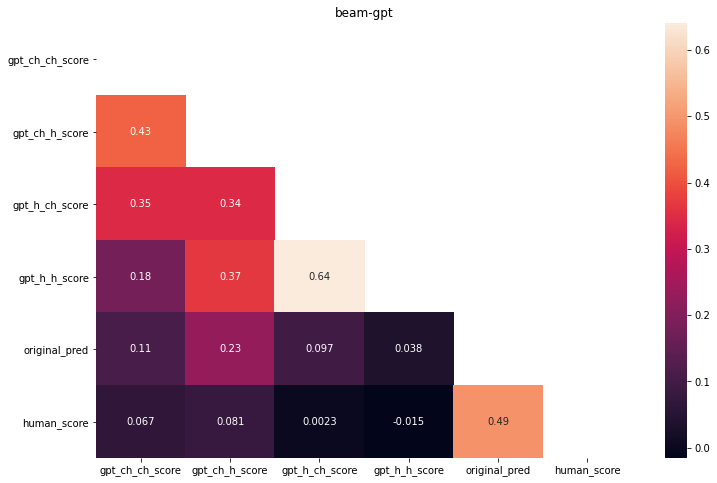

In [72]:
with open("saver.jsonl",'r') as f:
    data = [json.loads(el) for el in f.readlines()]
new_data = {}
for item in data:
    for k,v in item.items():
        if 'score' not in k and 'pred' not in k: continue
        if 'dgpt' in k: continue
        if k not in new_data:new_data[k]=[]
        new_data[k].append(v)
data = new_data
del new_data
tmp=data['human_score']
del data['human_score']
data['human_score'] = tmp
df = pd.DataFrame(data,columns=list(data.keys()))
f, ax = plt.subplots(figsize=(12, 8))
corrMatrix = df.corr()

mask = np.zeros_like(corrMatrix)
mask[np.triu_indices_from(mask)] = True

sn.heatmap(corrMatrix, annot=True,mask=mask)
plt.title("beam-gpt")
plt.show()

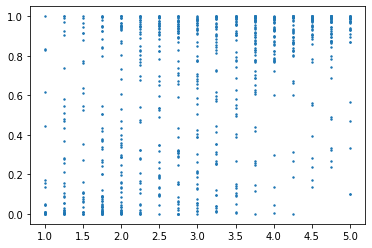

In [109]:
plt.scatter(data['human_score'],data['original_pred'],s=2)
plt.show()

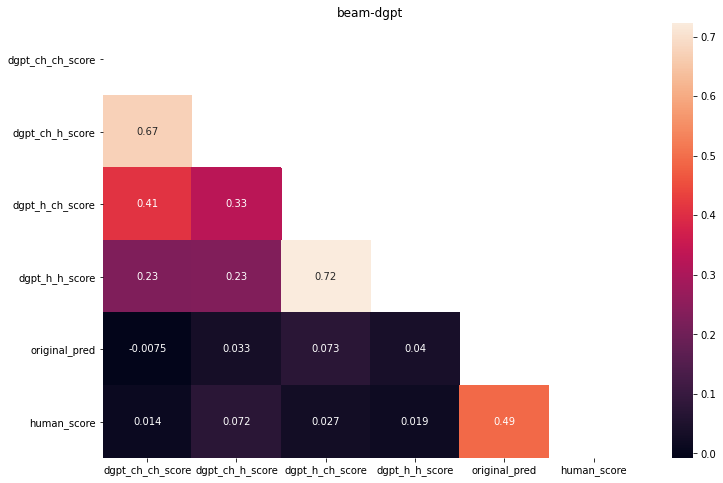

In [76]:
with open("saver.jsonl",'r') as f:
    data = [json.loads(el) for el in f.readlines()]
new_data = {}
for item in data:
    for k,v in item.items():
        if 'score' not in k and 'pred' not in k: continue
        if 'dgpt' not in k and 'gpt' in k: continue
        if k not in new_data:new_data[k]=[]
        new_data[k].append(v)
data = new_data
del new_data
tmp=data['human_score']
del data['human_score']
data['human_score'] = tmp
df = pd.DataFrame(data,columns=list(data.keys()))
f, ax = plt.subplots(figsize=(12, 8))
corrMatrix = df.corr()

mask = np.zeros_like(corrMatrix)
mask[np.triu_indices_from(mask)] = True

sn.heatmap(corrMatrix, annot=True,mask=mask)
plt.title("beam-dgpt")
plt.show()

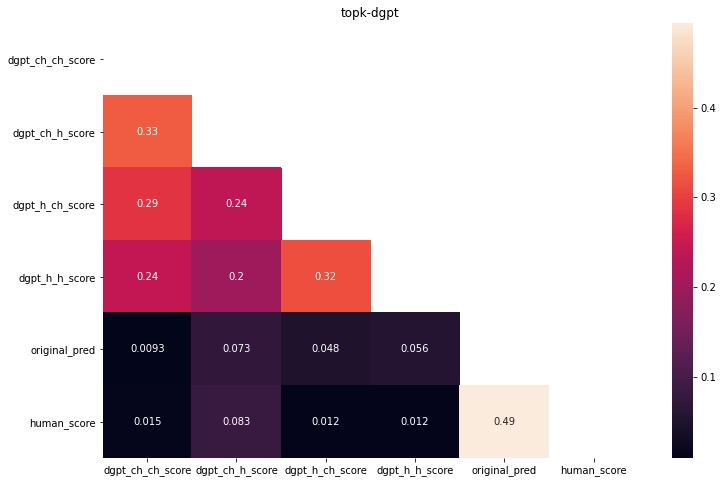

In [78]:
with open("saver_topk.jsonl",'r') as f:
    data = [json.loads(el) for el in f.readlines()]
new_data = {}
for item in data:
    for k,v in item.items():
        if 'score' not in k and 'pred' not in k: continue
        if 'dgpt' not in k and 'gpt' in k: continue
        if k not in new_data:new_data[k]=[]
        new_data[k].append(v)
data = new_data
del new_data
tmp=data['human_score']
del data['human_score']
data['human_score'] = tmp
df = pd.DataFrame(data,columns=list(data.keys()))
f, ax = plt.subplots(figsize=(12, 8))
corrMatrix = df.corr()

mask = np.zeros_like(corrMatrix)
mask[np.triu_indices_from(mask)] = True

sn.heatmap(corrMatrix, annot=True,mask=mask)
plt.title("topk-dgpt")
plt.show()

In [99]:
def merge_prediction(score1,score2,score1_ratio):
    assert len(score1) == len(score2)
    assert 0<=score1_ratio<=1
    merged = [score1_ratio*el1 + (1-score1_ratio)*el2 for el1,el2 in zip(score1,score2)]
    return merged

with open("saver_topk.jsonl",'r') as f:
    data = [json.loads(el) for el in f.readlines()]
new_data = {}
for item in data:
    for k,v in item.items():
        if 'score' not in k and 'pred' not in k: continue
        if k not in new_data:new_data[k]=[]
        new_data[k].append(v)
data = new_data
del new_data

def get_correlation(score1,score2):
    pears = pearsonr(score1,score2)[0]
    spear = spearmanr(score1,score2)[0]
    return round(pears,4),round(spear,4)

original_correlation = get_correlation(data['human_score'],data['original_pred'])
print("Original: {}".format(original_correlation))
for k,v in data.items():
    if k in ['human_score', 'original_pred']:
        continue
    for original_ratio in range(0,100,5):
        original_ratio /=100
        res = merge_prediction(data['original_pred'],v,original_ratio)
        changed_correlation = get_correlation(data['human_score'],res)
        if original_correlation[0]<changed_correlation[0]:
            print(f"{k:<15} {round(1-original_ratio,2):<5}: {changed_correlation}")
        
            




Original: (0.4943, 0.4728)
dgpt_ch_h_score 0.15 : (0.4957, 0.4773)
dgpt_ch_h_score 0.1  : (0.4965, 0.4809)
dgpt_ch_h_score 0.05 : (0.4959, 0.4825)
gpt_ch_ch_score 0.15 : (0.4955, 0.4786)
gpt_ch_ch_score 0.1  : (0.4958, 0.479)
gpt_ch_ch_score 0.05 : (0.4954, 0.4785)
gpt_h_h_score   0.05 : (0.4946, 0.48)
